# Case Study Examples for Bus Decomposition

### Example 1: MBTA Network and Ridership Evolution

This case study shows how to use the basic function of `busdecomp` for map matching and comparing service availability for the same network across long periods of time. It uses only publicly available GTFS feeds from the MBTA, and road network files from OpenStreetMap. 

Note: this example demonstrates the use of the map matching function, and therefore assumes that an instance of Valhalla is configured for the Boston metropolitan area on localhost:8002. 

In [1]:
import sys
 
# Set path to parent directory
sys.path.append('../')

# Turn off warnings for these examples
import warnings
warnings.filterwarnings('ignore')

# Import functions
from busdecomp import busdecomp_gtfs

In [2]:
# Point to example 1 data saved in repository 
base_path = '../data/MBTA_GTFS_JAN2011.zip'
comp_path = '../data/MBTA_GTFS_JAN2021.zip'
road_path = '../data/boston_roads_small.shp'

In [3]:
# Filter to one specific route for this example to limit edge output file sizes
route_ids = [['01-1079'], ['1']]

In [4]:
# Run edge decomposition from scratch using map matching algorithm
busdecomp_gtfs(base_path, comp_path, road_path, compare = True, route_ids = route_ids)

Edges matched for 0 of 67 patterns Elapsed time: 2.0
Timeout # 1
Total elapsed time: 191.0
Edges matched for 0 of 46 patterns Elapsed time: 2.0
Total elapsed time: 116.0
Total elapsed time: 1.0


Once the code above is executed successfully, three new files will be generated:
1. In the /data/ folder: An "MBTA_GTFS_JAN2011.geoJSON" file with the **base** network representated spatially as edges.
2. In the /data/ folder: An "MBTA_GTFS_JAN2021.geoJSON" file representing the **comparison** network represented spatially as edges.
3. In the /ouput/ folder: An "MBTA_GTFS_JAN2011_vs_MBTA_GTFS_JAN2021.geoJSON" file that combines the two edge networks above. Each edge includes properties of the edge in both networks and a categorical property indicating whether service was dropped, introduced, or maintained between the two periods.

Each of these files can then be visualized by dropping them into a GIS mapping tool. For example, the output comparison file is displayed using QGIS below: 

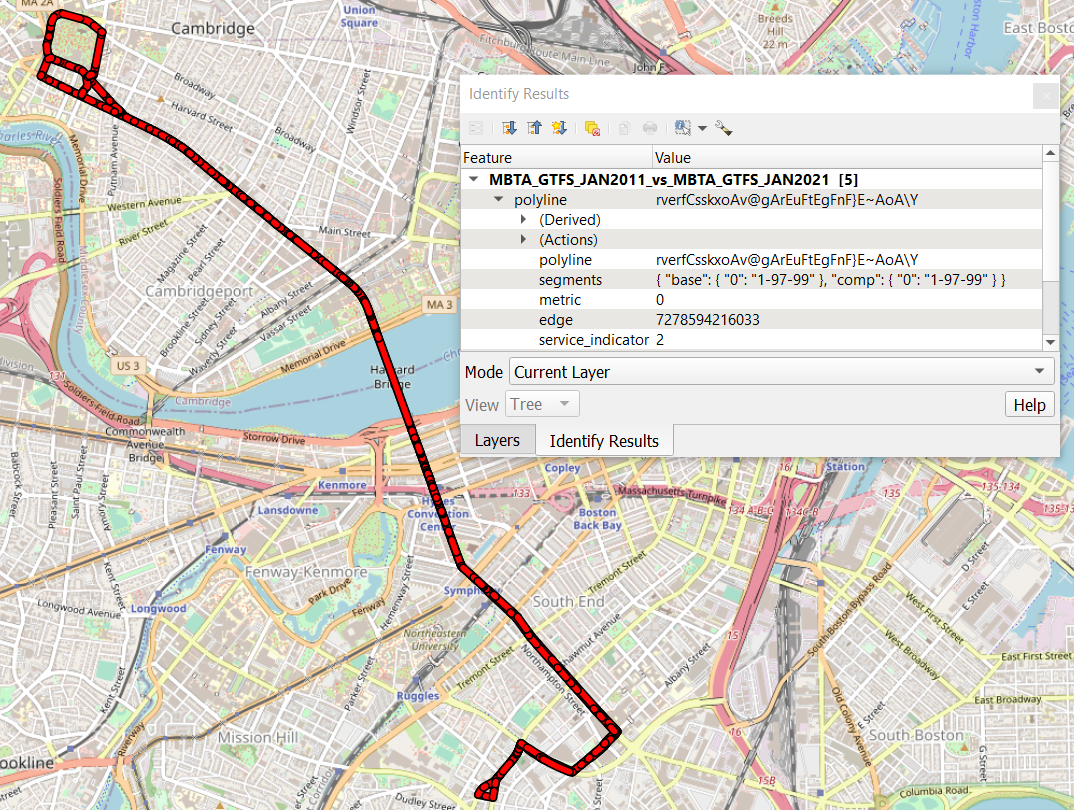

### Case Study 2: Visual Comparison of COVID-19 Policies

This case study shows how `busdecomp` can also be used to compare frequencies over time, and how it can be used without initial map matching if the analyst is confident in the quality of the shapes.txt table in the GTFS feeds. 

In [5]:
import sys
 
# Set path to parent directory
sys.path.append('../')
 
# Import functions
from busdecomp import busdecomp_gtfs

In [9]:
# Point to example 2 data saved in repository 
base_path = '../data/MBTA_GTFS_OCT2019.zip'
comp_path = '../data/MBTA_GTFS_OCT2020.zip'
road_path = '../data/boston_roads_small.shp'

In [7]:
# Filter to one specific route for this example to limit edge output file sizes
route_ids = [['1'], ['1']]

In [10]:
# Run edge decomposition from scratch using map matching algorithm and compare with metrics (frequency)
busdecomp_gtfs(base_path, comp_path, road_path, compare = True, metrics = True, route_ids = route_ids)

Timeout # 1
Edges matched for 0 of 51 patterns Elapsed time: 2.0
Total elapsed time: 128.0
Edges matched for 0 of 48 patterns Elapsed time: 2.0
Total elapsed time: 122.0
Total elapsed time: 34.0


Once the code above is executed successfully, three new files will be generated:
1. In the /data/ folder: An "MBTA_GTFS_OCT2019.geoJSON" file with the **base** network representated spatially as edges and a property containing the frequency of each route.
2. In the /data/ folder: An "MBTA_GTFS_OCT2020.geoJSON" file representing the **comparison** network represented spatially as edges a property containing the frequency of each route.
3. In the /ouput/ folder: An "MBTA_GTFS_OCT2019_vs_MBTA_GTFS_OCT2020.geoJSON" file that combines the two edge networks above. Each edge includes properties of the edge in both networks, a categorical property indicating whether service was dropped, introduced, or maintained between the two periods, and a property showing the difference in frequency between the two periods.

Like in Example 1, each of these files can then be visualized by dropping them into a GIS mapping tool. For example, the output comparison file is displayed using QGIS below where the edges are colored based on the change in frequency. The inbound (southbound) direction of Route 1 had slightly fewer daily trips added relative to the outbound (northbound) direction. 

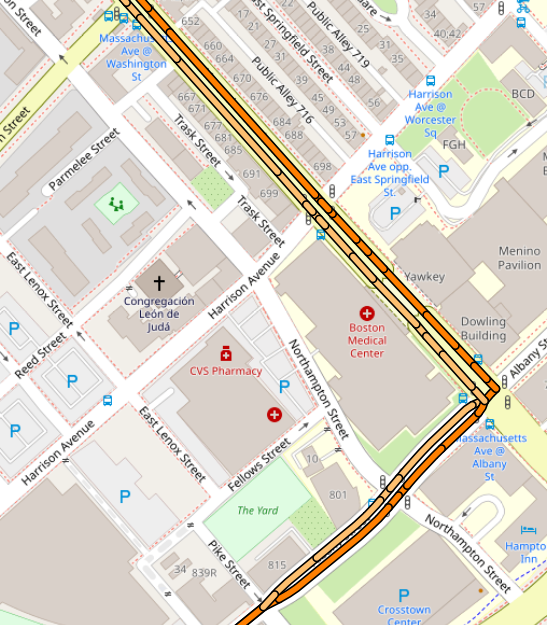